# CPSC322 Final Project
## The Statistical Analysis of Correlation Between United States Airline Stocks and Covid-19 Data

In [807]:
import importlib
from matplotlib import pyplot as plt
import os
importlib.reload(os)

import mysklearn.mypytable
importlib.reload(mysklearn.mypytable)
from mysklearn.mypytable import MyPyTable

import mysklearn.myutils as myutils
importlib.reload(myutils)

import mysklearn.plot_utils as plt_utils
importlib.reload(plt_utils)

data_name = os.path.join("input_data", "322-Project-Table.csv")
projectData = MyPyTable().load_from_file(data_name)

In [808]:
def combineColumn(col1, col2):
    table = []
    for i in range(len(col1)):
        row = [col1[i], col2[i]]
        table.append(row)
    return table

In [809]:
covidStatus = projectData.get_column("before-or-during-Covid")

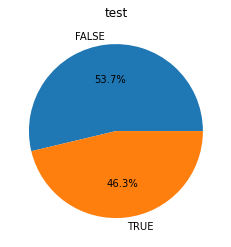

In [810]:
jbluIncrese = projectData.get_column("JBLU-Went-Up?")

x_list = set(jbluIncrese)
jbluCount = [jbluIncrese.count(label) for label in x_list]
plt_utils.pie_graph(x_list, jbluCount, "test")

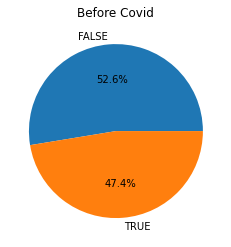

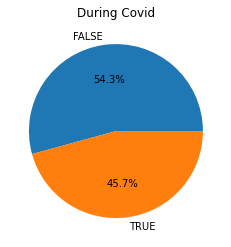

In [811]:
jbluCovid = combineColumn(jbluIncrese, covidStatus)
group_names, group_subtables = myutils.group_by(jbluCovid, 1)
before = myutils.get_column(group_subtables[0], 0)

x_list = set(before)
beforeCount = [before.count(label) for label in x_list]
plt_utils.pie_graph(x_list, beforeCount, f"{group_names[0]} Covid".title())

during = myutils.get_column(group_subtables[1], 0)

x_list = set(during)
duringCount = [during.count(label) for label in x_list]
plt_utils.pie_graph(x_list, duringCount, f"{group_names[1]} Covid".title())

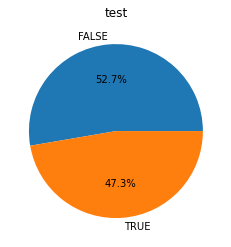

In [812]:
ualIncrese = projectData.get_column("UAL-Went-Up?")

x_list = set(ualIncrese)
jbluCount = [ualIncrese.count(label) for label in x_list]
plt_utils.pie_graph(x_list, jbluCount, "test")

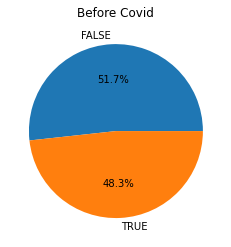

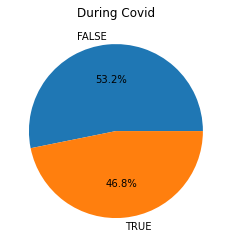

In [813]:
ualCovid = combineColumn(ualIncrese, covidStatus)
group_names, group_subtables = myutils.group_by(ualCovid, 1)

before = myutils.get_column(group_subtables[0], 0)
x_list = set(before)
beforeCount = [before.count(label) for label in x_list]
plt_utils.pie_graph(x_list, beforeCount, f"{group_names[0]} Covid".title())

during = myutils.get_column(group_subtables[1], 0)
x_list = set(during)
duringCount = [during.count(label) for label in x_list]
plt_utils.pie_graph(x_list, duringCount, f"{group_names[1]} Covid".title())

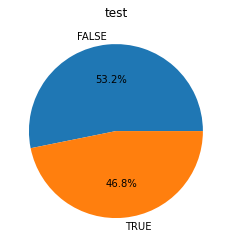

In [814]:
aalIncrese = projectData.get_column("AAL-Went-Up?")

x_list = set(aalIncrese)
jbluCount = [aalIncrese.count(label) for label in x_list]
plt_utils.pie_graph(x_list, jbluCount, "test")

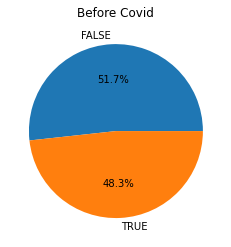

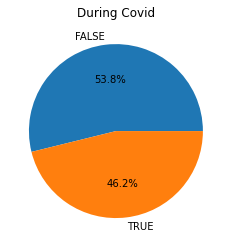

In [815]:
aalCovid = combineColumn(aalIncrese, covidStatus)
group_names, group_subtables = myutils.group_by(aalCovid, 1)

before = myutils.get_column(group_subtables[0], 0)
x_list = set(before)
beforeCount = [before.count(label) for label in x_list]
plt_utils.pie_graph(x_list, beforeCount, f"{group_names[0]} Covid".title())

during = myutils.get_column(group_subtables[1], 0)
x_list = set(during)
duringCount = [during.count(label) for label in x_list]
plt_utils.pie_graph(x_list, duringCount, f"{group_names[1]} Covid".title())

In [816]:
jbluPercent = projectData.get_column("JBLU-Day-Price-Increase-(%)")
ualPercent = projectData.get_column("UAL-Day-Price-Increase-(%)")
aalPercent = projectData.get_column("AAL-Day-Price-Increase-(%)")
xonPercent = projectData.get_column("XOM-Day-Price-Increase-(%)")
dateCol = projectData.get_column("Market-Date")

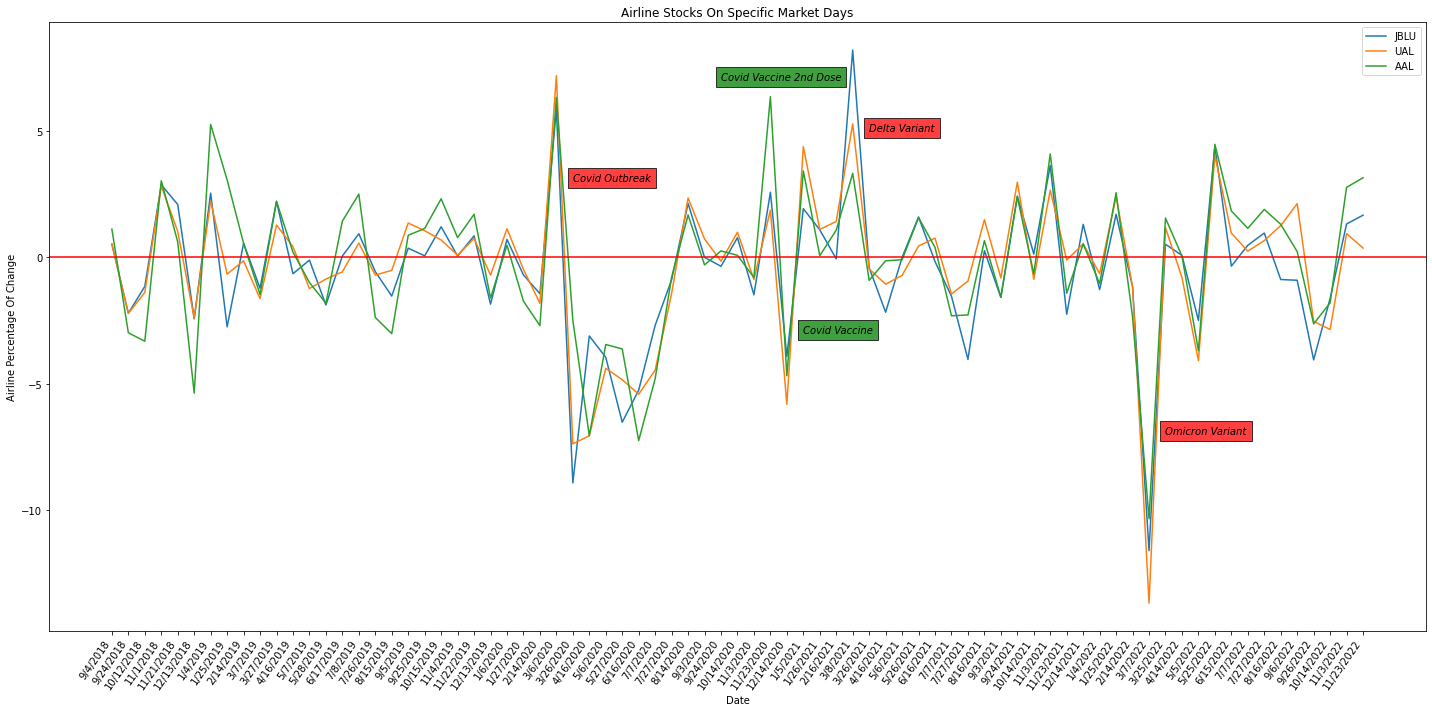

In [817]:
dayIndex = [i for i in range(len(dateCol)) if i % 14 == 0]
weekDate = [dateCol[index] for index in dayIndex]
jbluPercentWeek = [jbluPercent[index] for index in dayIndex]
ualPercentWeek = [ualPercent[index] for index in dayIndex]
aalPercentWeek = [aalPercent[index] for index in dayIndex]
xonPercentWeek = [xonPercent[index] for index in dayIndex]

Y_list = {"JBLU":jbluPercentWeek, "UAL":ualPercentWeek, "AAL":aalPercentWeek}

axis_label = ("Date", "Airline Percentage Of Change")
graph_name = "Airline Stocks On Specific Market Days"

plt_utils.multiple_line_graph(weekDate, Y_list, axis_label, graph_name)

In [818]:
xonPercent = projectData.get_column("XOM-Day-Price-Increase-(%)")
worldCasePercent = projectData.get_column("total-world-cases-increase-(%)")
usCasePercent = projectData.get_column("total-usa-cases-increase-(%)")

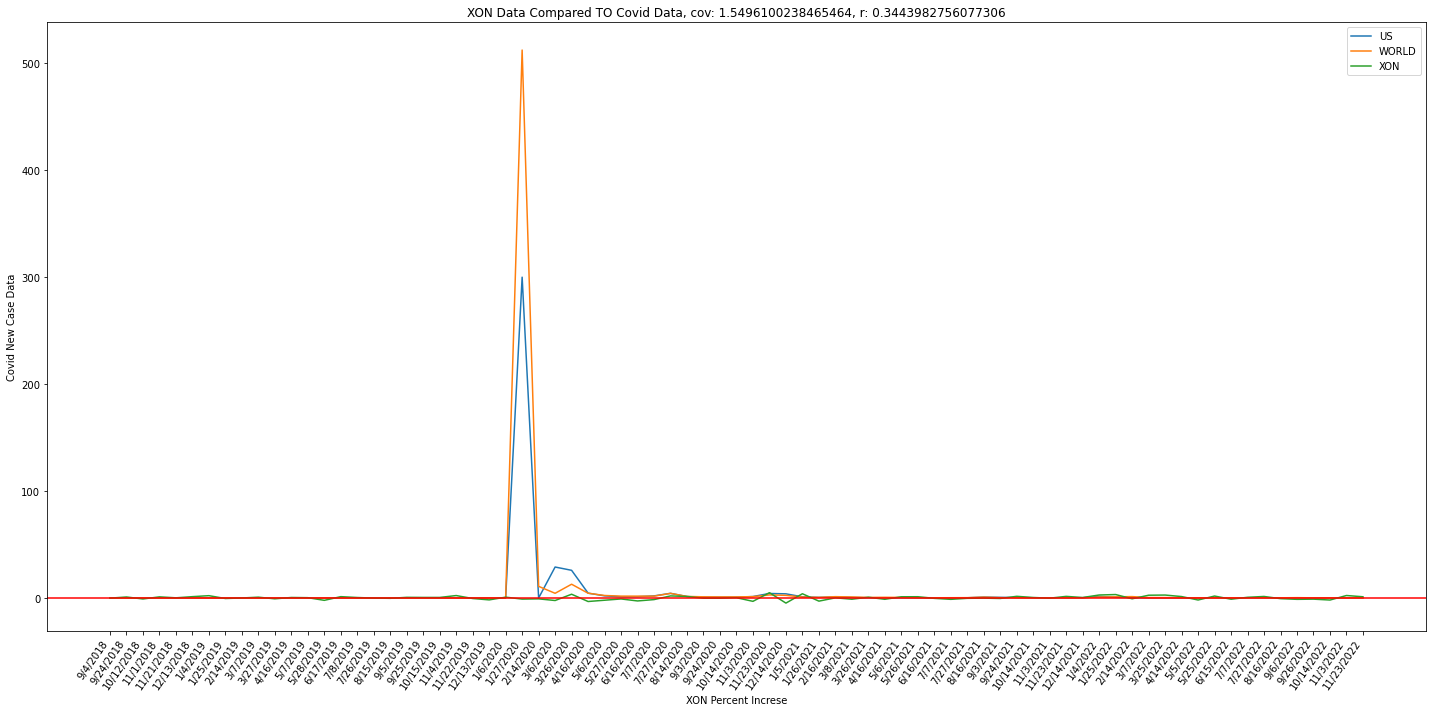

In [819]:
xonPercentWeek = [xonPercent[index] for index in dayIndex]
worldCaseWeek = [worldCasePercent[index] for index in dayIndex]
usCaseWeek = [usCasePercent[index] for index in dayIndex]

axis_label = ("XON Percent Increse", "Covid New Case Data")
cov, coeff = myutils.calculate_covariance_and_coeff(xonPercent, jbluPercent)
graph_name = f"XON Data Compared TO Covid Data, cov: {cov}, r: {coeff}"
Y_list = {"US":usCaseWeek, "WORLD": worldCaseWeek, "XON":xonPercentWeek}
plt_utils.double_line_graph(weekDate, Y_list, axis_label, graph_name)

In [820]:
FIRST_CASE = "1/31/2019"
VALLEY_CASE = "11/2/2020"

f_index = dateCol.index(FIRST_CASE)
v_index = dateCol.index(VALLEY_CASE)

pre_covidIndex = [i for i in range(f_index)]
during_covidIndex = [i for i in range(f_index, v_index+1)]
post_covidIndex = [i for i in range(v_index, len(dateCol))]

xonPercent_pre = [xonPercent[index] for index in pre_covidIndex]
xonPercent_dur = [xonPercent[index] for index in during_covidIndex]
xonPercent_pos = [xonPercent[index] for index in post_covidIndex]

date_pre = [dateCol[index] for index in pre_covidIndex]
date_dur = [dateCol[index] for index in during_covidIndex]
date_pos = [dateCol[index] for index in post_covidIndex]

In [821]:
axis_label = ("Date", "XON Percent Pre-Covid")
graph_name = "XON Stock Pre-Covid"
plt_utils.line_graph(date_pre, xonPercent_pre, axis_label, graph_name)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3369, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_30269/2873710944.py", line 2, in <cell line: 2>
    cov, coeff = myutils.calculate_covariance_and_coeff(date_pre, xonPercent_pre)
  File "/home/CPSC322-Final-Project/mysklearn/myutils.py", line 60, in calculate_covariance_and_coeff
    meanx = np.mean(x_list)
  File "<__array_function__ internals>", line 5, in mean
  File "/opt/conda/lib/python3.9/site-packages/numpy/core/fromnumeric.py", line 3440, in mean
    return _methods._mean(a, axis=axis, dtype=dtype,
  File "/opt/conda/lib/python3.9/site-packages/numpy/core/_methods.py", line 179, in _mean
    ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
TypeError: cannot perform reduce with flexible type

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File 